In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential

In [2]:
train_path='train'
categories=['NORMAL','PNEUMONIA']
X_train=[]
y_train=[]
for category in categories:
  fold_path=os.path.join(train_path,category)
  # print(fold_path)
  images=os.listdir(fold_path)
  # print(images)
  for img in images:
    img_path=os.path.join(fold_path,img)
    # print(img_path)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    X_train.append(img)
    y_train.append(categories.index(category))
print('Loaded_category',category)

Loaded_category PNEUMONIA


In [3]:
test_path='test'
categories=categories=['NORMAL','PNEUMONIA']
X_test=[]
y_test=[]
for category in categories:
  fold_path=os.path.join(test_path,category)
  # print(fold_path)
  images=os.listdir(fold_path)
  # print(images)
  for img in images:
    img_path=os.path.join(fold_path,img)
    # print(img_path)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    X_test.append(img)
    y_test.append(categories.index(category))
print('Loaded_category',category)

Loaded_category PNEUMONIA


In [4]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [5]:
X_train.shape,y_train.shape

((148, 150, 150, 1), (148,))

In [6]:
X_test.shape,y_test.shape

((40, 150, 150, 1), (40,))

In [7]:

model = Sequential()

# First convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))  ## drop 25% neurons (stop)

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(2, activation='softmax'))



In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(X_train,y_train,epochs=100,batch_size=6)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5259 - loss: 0.7304
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.5211 - loss: 0.6891
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.6295 - loss: 0.6229
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8643 - loss: 0.3831
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8984 - loss: 0.2315
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9286 - loss: 0.2100
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9313 - loss: 0.1726
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.8933 - loss: 0.2425
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9140 - loss: 0.2490
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9517 - loss: 0.1821
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9935 - loss: 0.0533
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step

In [10]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9729 - loss: 0.9230


[0.8519600033760071, 0.9750000238418579]

In [11]:
y_pred=model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[1.0000000e+00, 7.8041207e-10],
       [1.0000000e+00, 1.1675227e-08],
       [9.9999714e-01, 2.8407612e-06],
       [1.0000000e+00, 6.2692859e-12],
       [1.0000000e+00, 8.5317966e-09],
       [9.9994898e-01, 5.1017523e-05],
       [9.9999976e-01, 2.3402772e-07],
       [1.0000000e+00, 9.0325603e-12],
       [1.5847737e-15, 1.0000000e+00],
       [1.0000000e+00, 1.2884779e-08],
       [1.0000000e+00, 2.5437810e-10],
       [1.0000000e+00, 2.2289596e-11],
       [9.9999988e-01, 1.7481895e-07],
       [9.9998987e-01, 1.0184043e-05],
       [1.0000000e+00, 1.3500784e-09],
       [1.0000000e+00, 2.0479396e-09],
       [1.0000000e+00, 1.3179066e-08],
       [1.0000000e+00, 1.6811573e-10],
       [1.0000000e+00, 2.3457353e-10],
       [1.0000000e+00, 1.4683388e-09],
       [8.9201781e-16, 1.0000000e+00],
       [2.3067530e-25, 1.0000000e+00],
       [2.0950086e-18, 1.0000000e+00],
       [7.0985591e-16, 1.0000000e+00],
       [7.7160157e-20, 1.0000000e+00],
       [3.6518765e-25, 1.

In [12]:
y_pred1=y_pred.argmax(axis=1)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



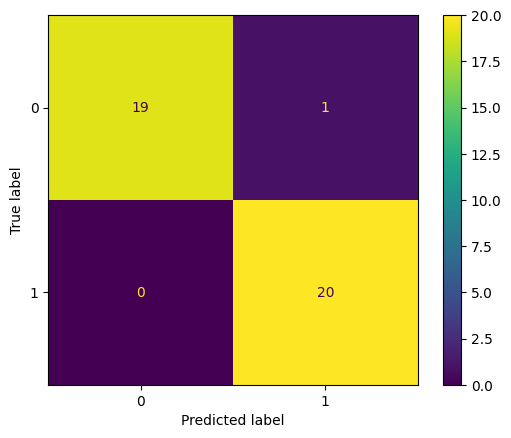

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [15]:
# Save the model in native Keras format
model.save("covid_detection_model.keras")
